In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import collections
import operator
%matplotlib inline

In [4]:
data8 = pd.read_json('8oct_pre_processed.json')
data10 = pd.read_json("10oct_pre_processed_merged.json", orient='records', lines=True)

# Comparative Data Analysis
### Sample Sizes illustrated

In [19]:
font = {'family':'Ubuntu',
        'weight' : '200',
        'size'   : 14}
matplotlib.rc('font', **font)

In [20]:
data_pie = pd.DataFrame([data8.shape[0], data10.shape[0]], 
                        index=['8th Oct', '10th Oct'], 
                        columns=['Number of tweets'])

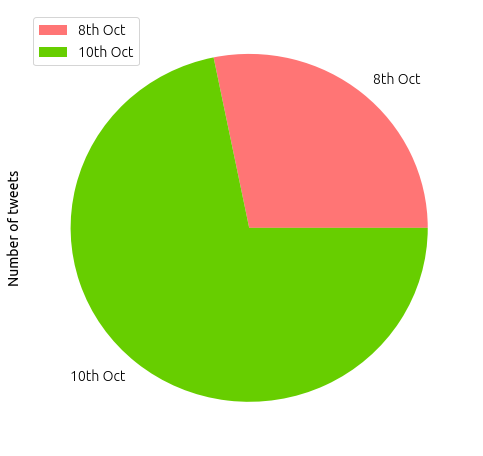

In [21]:
data_pie.plot.pie(['Number of tweets'], figsize=(8,8),  colors = ["#ff7575", "#67ce00"])

# Comparing trending Hashtags
### 8th

In [31]:
# Select only original tweets
data8_wo_rt = data8[data8['is_retweet'] == 0]['hashtags']
counted8 = collections.Counter([str("#" + htag) for row in list(data8_wo_rt) for htag in row])
htags_8 = counted8.most_common(20)

htags_8_df = pd.DataFrame([l[1] for l in htags_8], index=[l[0] for l in htags_8], columns=['# of tweets'])
htags_8_df.tail

<bound method NDFrame.tail of                     # of tweets
#recuperemelseny           9342
#catalonia                 1190
#8oct                       790
#8octbcnespanola            781
#cataluña                   762
#objetivocataluña           756
#barcelona                  574
#catalanreferendum          562
#parlemhablemos             516
#spain                      364
#españa                     339
#catalunya                  319
#justiceleague              235
#felizdomingo               219
#diesclautv3                178
#democracia                 177
#rajoy                      141
#puigdemont                 129
#news                       119
#mayoriasilenciosa          112>

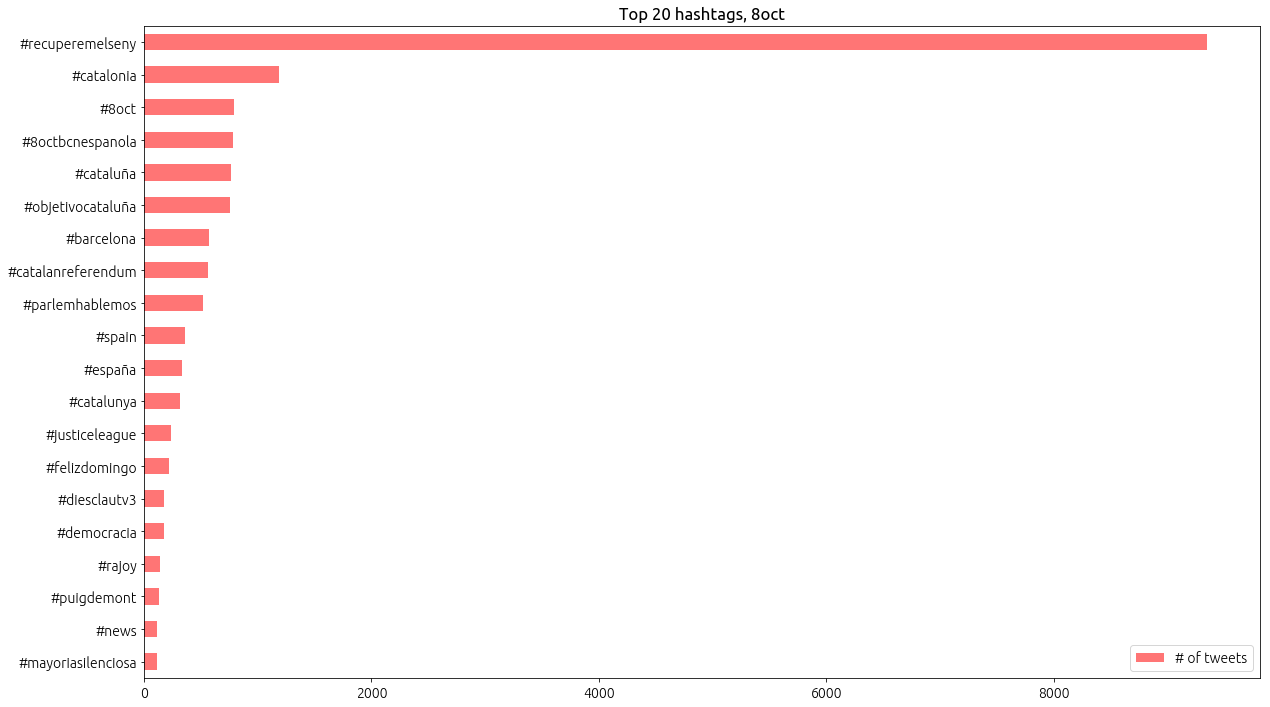

In [46]:
htags_8_df = htags_8_df.sort_values(by='# of tweets', ascending=True)
htags_8_df.plot.barh(figsize=(20,12),color='#ff7575', title="Top 20 hashtags, 8oct")
plt.savefig('8oct_20_top_hashtags.png')

### 10th

In [36]:
data10_wo_rt = data10[data10['is_retweet'] == 0]['hashtags']
counted10 = collections.Counter([str("#" + htag) for row in list(data10_wo_rt) for htag in row])
htags_10 = counted10.most_common(20)

htags_10_df = pd.DataFrame([l[1] for l in htags_10], index=[l[0] for l in htags_10], columns=['# of tweets'])

In [37]:
htags_10_df.tail

<bound method NDFrame.tail of                          # of tweets
#10oct                         27078
#puigdemont                    23839
#catalonia                      6084
#cataluña                       3951
#parlament                      3905
#catalanreferendum              2879
#catalunya                      2126
#independencia                  1354
#arvcatladecision               1212
#dui                            1127
#arvcatladecisión               1107
#mvt10oct                       1060
#spain                          1019
#españa                          993
#catalogne                       979
#cuernavaca                      960
#morelos                         960
#independenciacatalunya          936
#uaem                            931
#catalogna                       831>

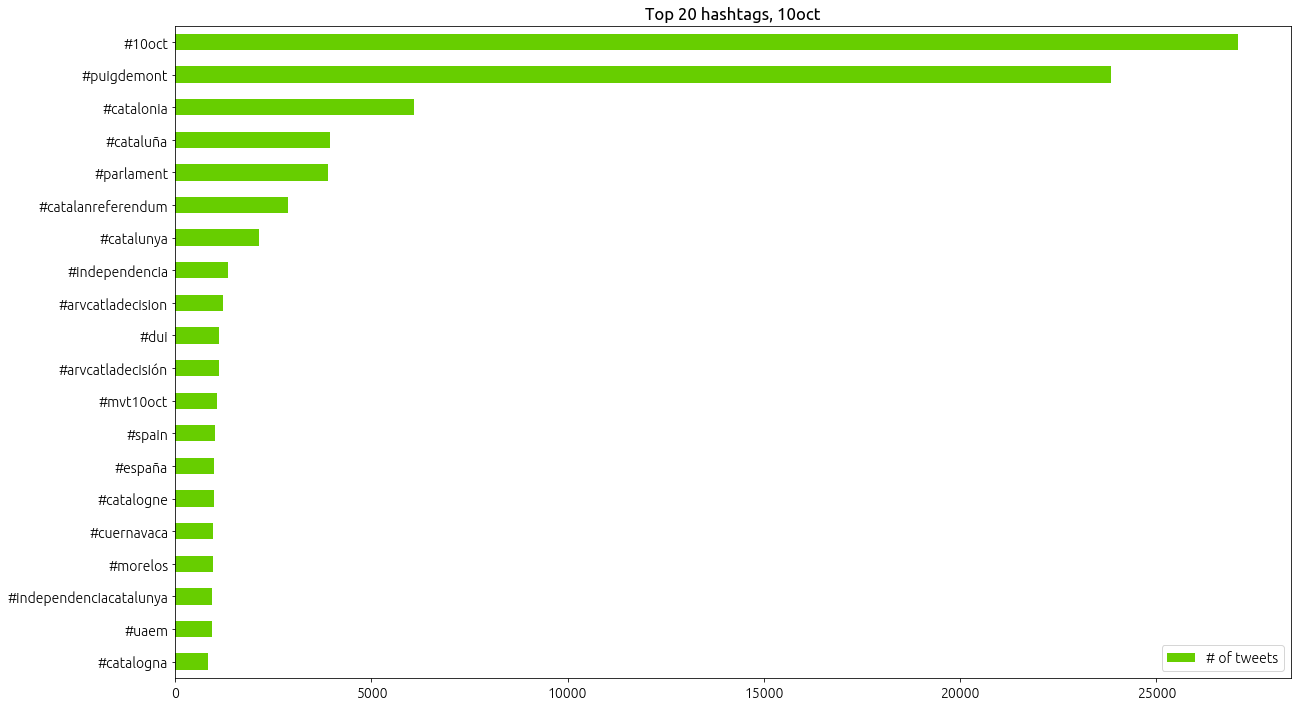

In [45]:
htags_10_df = htags_10_df.sort_values(by='# of tweets', ascending=True)
htags_10_df.plot.barh(figsize=(20,12),color='#67ce00', title="Top 20 hashtags, 10oct")
plt.savefig('10oct_20_top_hashtags.png')

# Time Series Analysis

### Formatting the data

In [80]:
# Take only the two required columns from the original data
data18 = pd.DataFrame(data=data8, columns=['created_at','# Tweets'])
data110 = pd.DataFrame(data=data10, columns=['created_at','# Tweets'])

# Group by repeating times
data28 = data18.groupby(['created_at']).count()
data210 = data110.groupby(['created_at']).count()

# Group the data per 30 min
per_30min8 = data28.resample('30min').sum() 
per_30min10 = data210.resample('30min').sum()

### Clustering the data into 30 minute clusters

In [83]:
# Drop data points that went over the wanted time period (the very end and beginning)
droppedLast = per_30min8[1:-1]
droppedLast10 = per_30min10[1:-1]

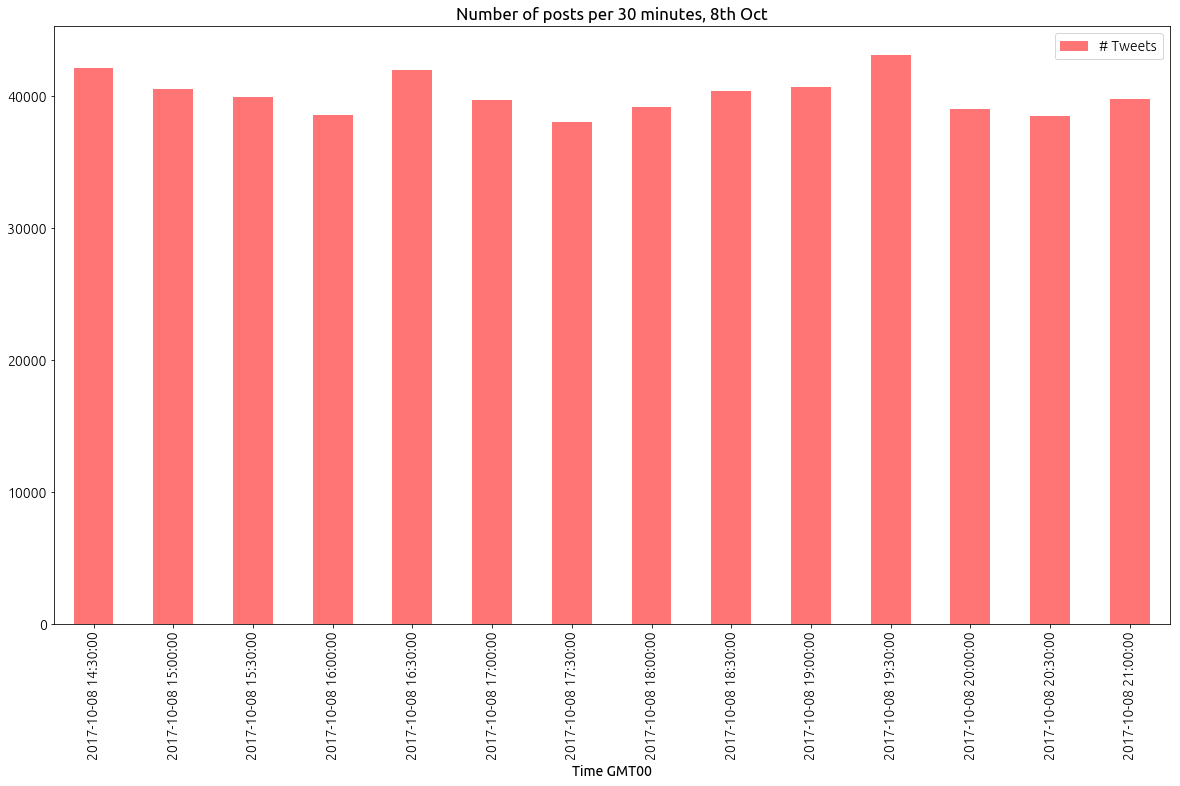

In [88]:
# This is the final formatting before plotting
ax = droppedLast.plot.bar(figsize = (20,11), title = 'Number of posts per 30 minutes, 8th Oct', color = "#ff7575")
ax.set_xlabel("Time GMT00")



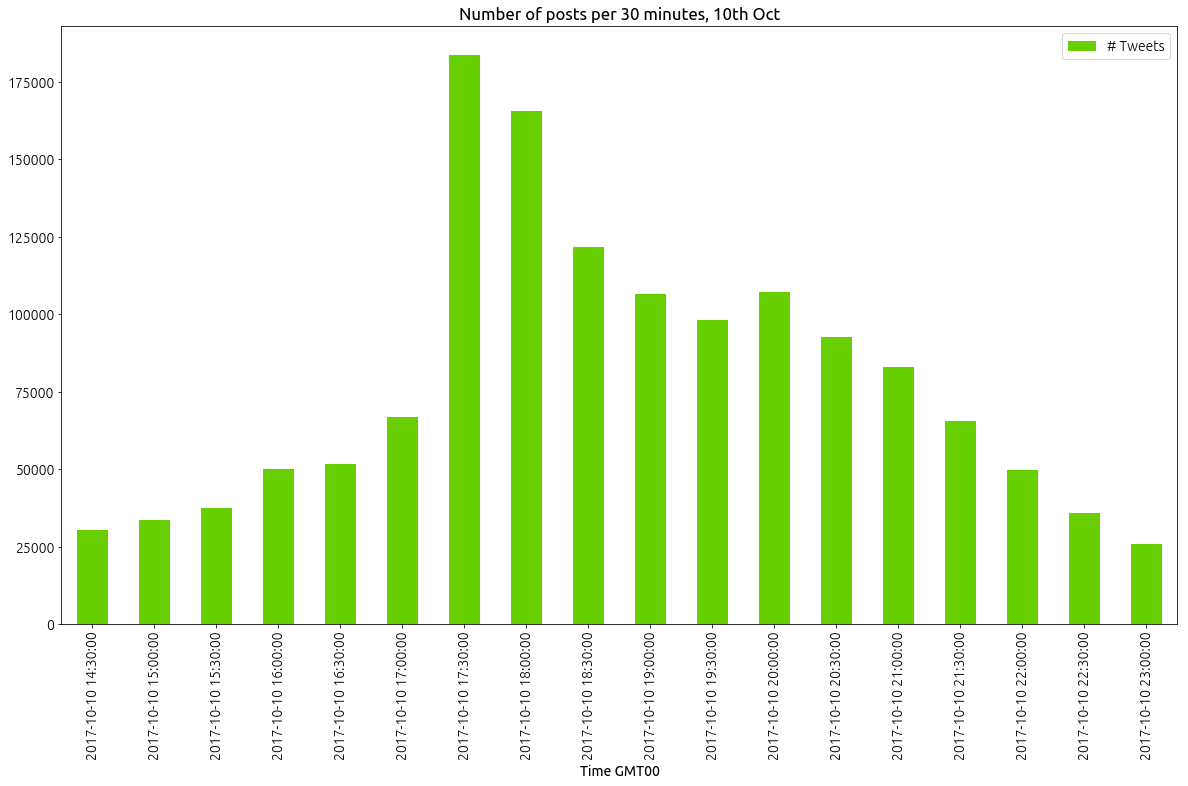

In [89]:
ax = droppedLast10.plot.bar(figsize = (20,11), title = 'Number of posts per 30 minutes, 10th Oct', color = "#67ce00")
ax.set_xlabel("Time GMT00")
plt.savefig('timeseries2.png')